# Subtrees

Your task is to count the nodes that have the same number of nodes in each child subtree.

In a file `subtrees.py`, implement a function `count` that returns the desired count.

In [ ]:
class Node:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children

def count(node):
    # TODO

if __name__ == "__main__":
    tree = Node(1, [
               Node(2),
               Node(3, [Node(4, [Node(5), Node(6)])]),
               Node(7, [Node(8), Node(9)])
           ])

    print(count(tree)) # 8

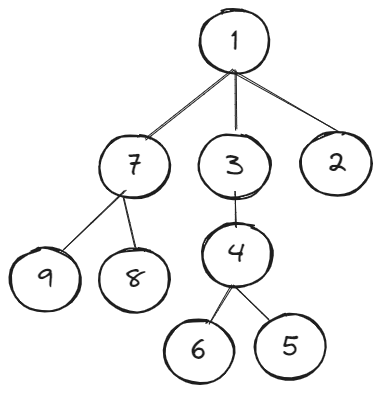

The task described on the page is about finding and counting all the nodes in a tree data structure where the number of child nodes (subtrees) to the left and right are equal. In other words, you need to identify nodes that have a balanced number of children on both sides.

Here’s a breakdown of the task:

- **Balanced Node**: A node with an equal number of child nodes on each side.
- **Counting Function**: Implement a function named count that will return the total number of balanced nodes.
- **Tree Structure**: The tree is made up of nodes, where each node can have zero or more child nodes.

## Attempt 1

In [1]:
class Node:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children
    
    def __repr__(self):
        return str(self.value)        

def traverse(node, depth):
    print("node", node, "depth", depth)
    for child in node.children:
        traverse(child, depth + 1)
        
def list_tree(node, level=0):
    print(" "*(level*4),"node =" ,node)
    for subordinate in node.children:
        list_tree(subordinate, level + 1)

if __name__ == "__main__":
    tree = Node(1, [
               Node(2),
               Node(3, [Node(4, [Node(5), Node(6)])]),
               Node(7, [Node(8), Node(9)])
           ])

    traverse(tree, 0)
    list_tree(tree)

node 1 depth 0
node 2 depth 1
node 3 depth 1
node 4 depth 2
node 5 depth 3
node 6 depth 3
node 7 depth 1
node 8 depth 2
node 9 depth 2
 node = 1
     node = 2
     node = 3
         node = 4
             node = 5
             node = 6
     node = 7
         node = 8
         node = 9


In [1]:
class Node:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children

def count_subtree_nodes(node):
    if not node.children:
        return 1, True  # A leaf node has 1 node and trivially uniform

    subtree_sizes = []
    uniform = True

    for child in node.children:
        child_count, child_uniform = count_subtree_nodes(child)
        subtree_sizes.append(child_count)
        if not child_uniform:
            uniform = False

    # Check if all subtree sizes are the same
    if len(set(subtree_sizes)) != 1:
        uniform = False

    return sum(subtree_sizes) + 1, uniform

def count(node):
    if not node:
        return 0

    _, uniform = count_subtree_nodes(node)
    node_count = 1 if uniform else 0

    for child in node.children:
        node_count += count(child)

    return node_count

if __name__ == "__main__":
    tree = Node(1, [
               Node(2),
               Node(3, [Node(4, [Node(5), Node(6)])]),
               Node(7, [Node(8), Node(9)])
           ])

    print(count(tree))  # Should print 8

8
